Importing Libraries

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras==2.7.0
!pip install tensorflow==2.7.0

     |████████████████████████████████| 1.3 MB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 489.6 MB 41 kB/s s eta 0:00:01███████████████           | 322.5 MB 81.5 MB/s eta 0:00:03
     |████████████████████████████████| 13.4 MB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 56.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 69.6 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuf

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import numpy 
import tensorflow 

Loading Data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Reshaping Data

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalizing

In [8]:
x_train /= 255
x_test /= 255

One Hot Encoding

In [9]:
number_of_classes = 10 
y_train = np_utils.to_categorical(y_train, number_of_classes) 
y_test = np_utils.to_categorical(y_test, number_of_classes)

Creating Model

In [10]:
model = Sequential() 
model.add(Convolution2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

Compiling the model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

Fitting the model

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1773 - accuracy: 0.9461 - val_loss: 0.0623 - val_accuracy: 0.9792
Epoch 2/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0498 - val_accuracy: 0.9839
Epoch 3/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0373 - val_accuracy: 0.9875
Epoch 4/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0390 - val_accuracy: 0.9868
Epoch 5/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0383 - val_accuracy: 0.9885
Epoch 6/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0384 -

Observing the Metrics

In [13]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.04922742024064064, 0.9909999966621399]


Saving the Model

In [14]:
model.save("mnistCNN.h5")

In [15]:
!tar -zcvf image-classification-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [16]:
ls -1

image-classification-model_new.tgz
mnistCNN.h5


In [17]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 24.4 MB/s eta 0:00:01


In [18]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                "url":"https://us-south.ml.cloud.ibm.com",
                "apikey":"LtPRRAyAmtoUwbPHBoSge1DPZ_YFHi7BJIHObMbl6Yld"
                }
client=APIClient(wml_credentials)

In [19]:
client=APIClient(wml_credentials)

In [20]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [21]:
space_uid =guid_from_space_name(client,'mnistclassification')
print("Space UID=" +space_uid)

Space UID=80779740-4eb2-4678-b436-b4a6032abf8b


In [22]:
client.set.default_space(space_uid)

'SUCCESS'

In [23]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [24]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [25]:
model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id=client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [26]:
model_id

'bfb33150-7359-45cf-b854-ced5f74fc5ee'

In [27]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [28]:
from keras.models import load_model
from keras.preprocessing import image

In [29]:
model=load_model("mnistCNN.h5")

In [50]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_dcd1dfcd57ca43dda6f1fa74cfe3a802 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_dcd1dfcd57ca43dda6f1fa74cfe3a802 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_dcd1dfcd57ca43dda6f1fa74cfe3a802 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CQFJmLyy2FhCMjgeZvZqwWqMDwQ7-cMptxYWv63BbybM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_dcd1dfcd57ca43dda6f1fa74cfe3a802)

streaming_body_7 = client_dcd1dfcd57ca43dda6f1fa74cfe3a802.get_object(Bucket='mnistclassification-donotdelete-pr-k0rpugbl42eqs3', Key='4.png')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


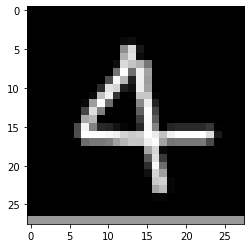

In [51]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img1 = Image.open(streaming_body_7)
newsize = (28, 28)
img = img1.resize(newsize)
im_array = np.asarray(img)

plt.imshow(im_array)
plt.show()

In [55]:
x=image.img_to_array(img)
print(x.shape)

x = x[:,:,0]
print(x.shape)

x=np.expand_dims(x, axis=0)
print(x.shape)

(28, 28, 4)
(28, 28)
(1, 28, 28)


In [56]:
x= x.reshape(1, 28, 28, 1)

In [57]:
y=model.predict(x)
y

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
pred=np.argmax(y, axis=1)
pred

array([4])

In [59]:
if(pred == 0) :
    print("Zero")
elif(pred == 1) :
    print("One")
elif(pred == 2) :
    print("Two")
elif(pred == 3) :
    print("Three")
elif(pred == 4) :
    print("Four")
elif(pred == 5) :
    print("Five")
elif(pred == 6) :
    print("Six")
elif(pred == 7) :
    print("Seven")
elif(pred == 8) :
    print("Eight")
else:
    print("Nine")

Four
